In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import KNNImputer,IterativeImputer,SimpleImputer
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('temperature.csv')
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [3]:
df=df.dropna()

.

.

<Axes: xlabel='Date', ylabel='Present_Tmax'>

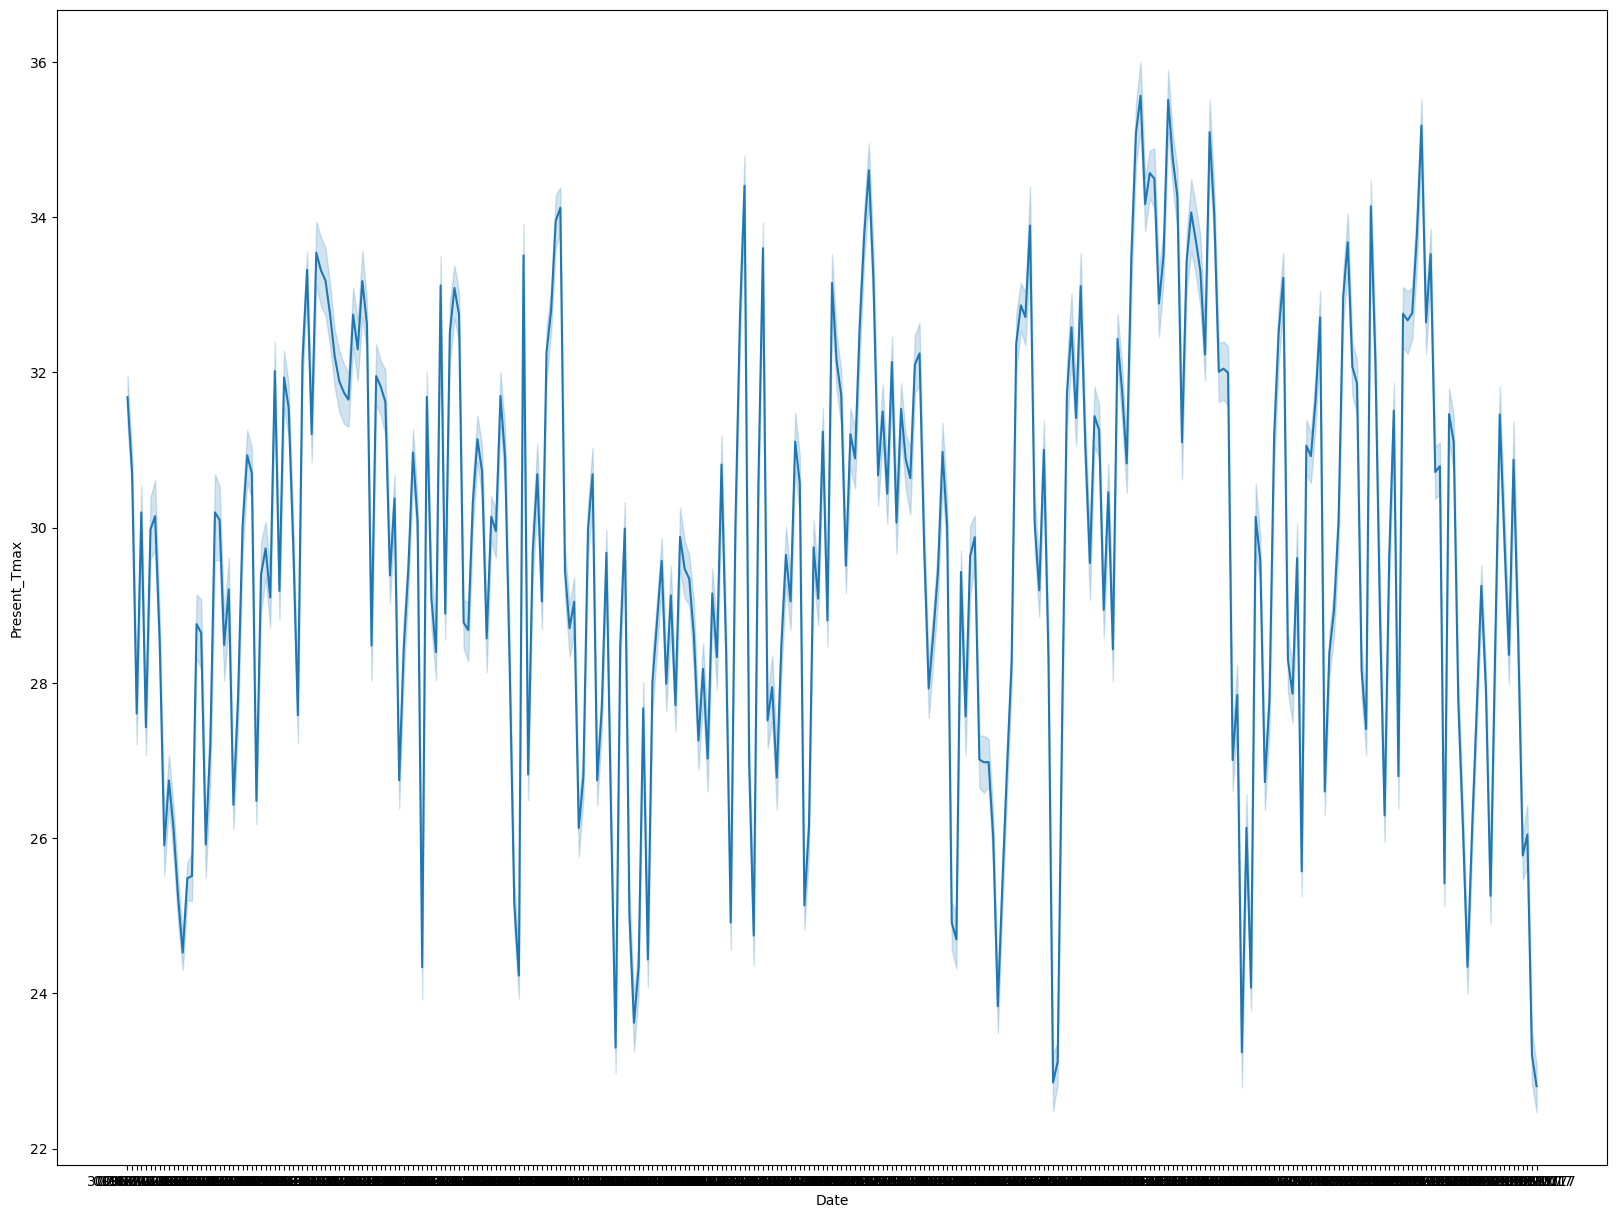

In [4]:
plt.figure(figsize=(20,15))
sns.lineplot(x='Date',y='Present_Tmax',data=df)

<Axes: xlabel='Date', ylabel='Present_Tmin'>

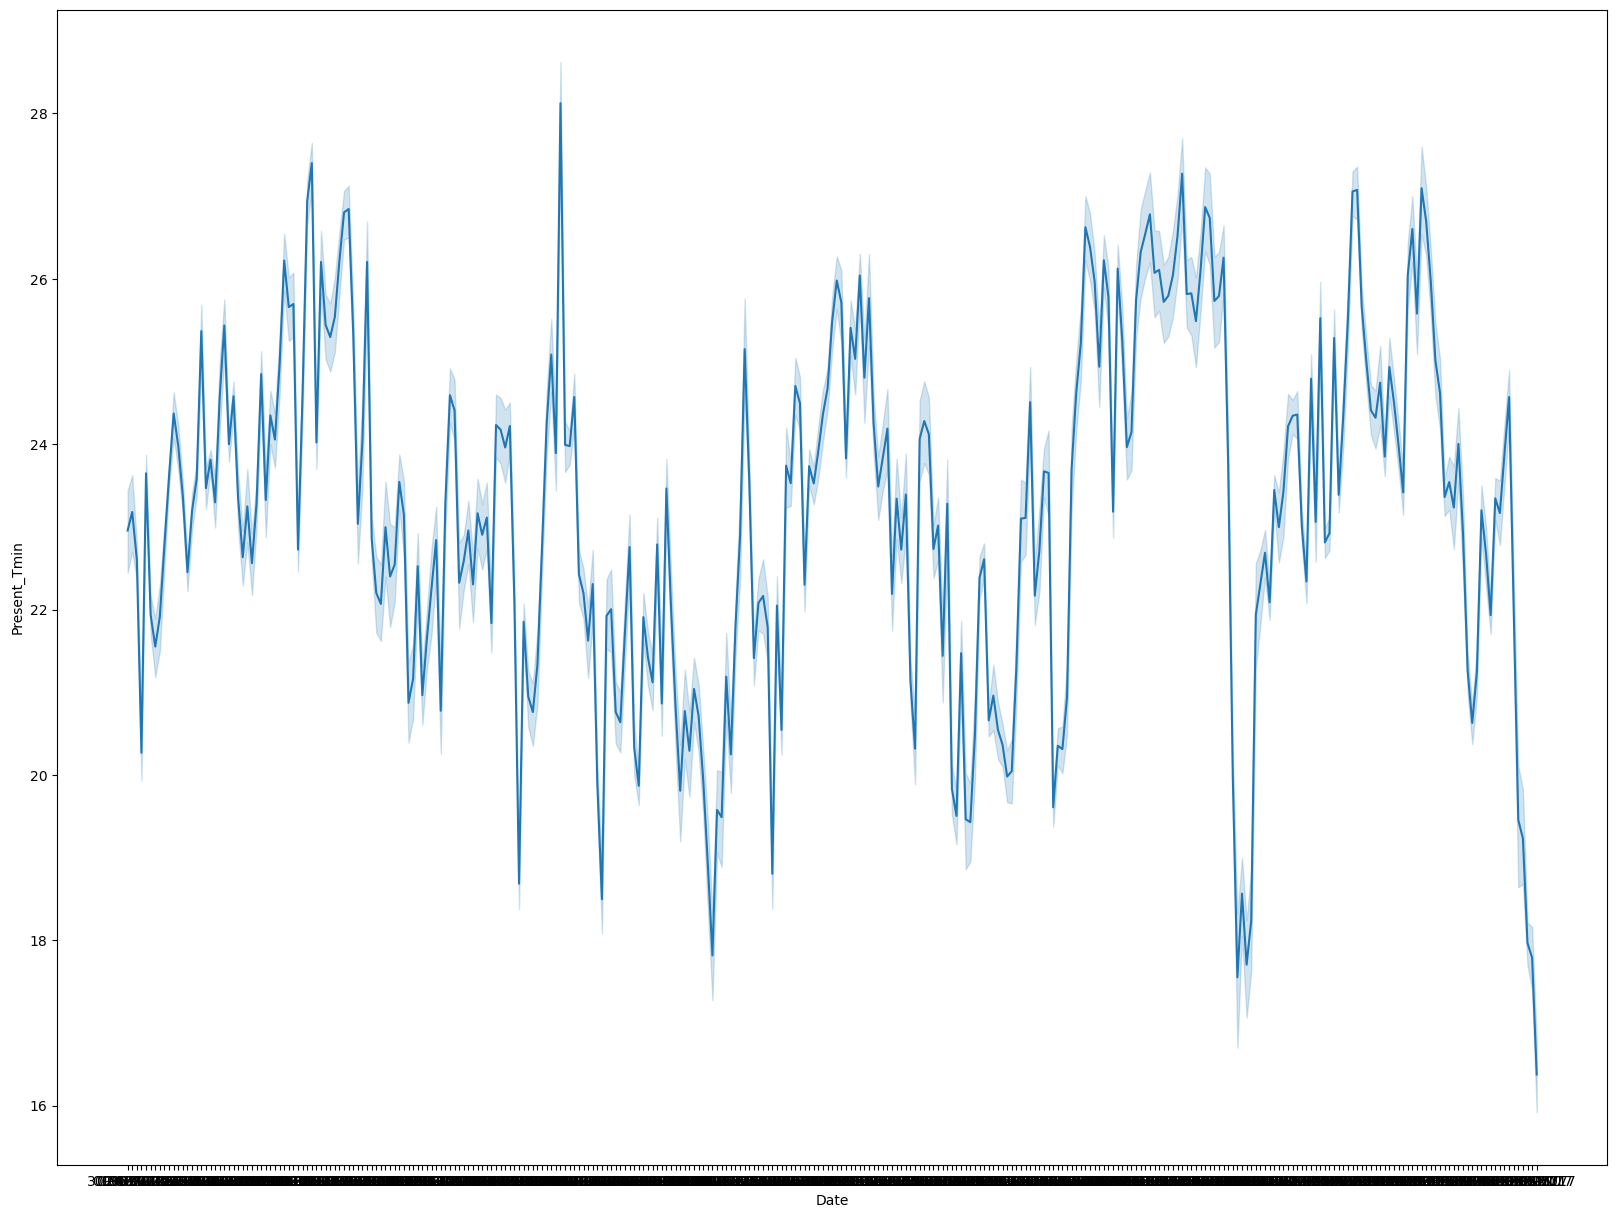

In [5]:
plt.figure(figsize=(20,15))
sns.lineplot(x='Date',y='Present_Tmin',data=df)

.

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

<Axes: xlabel='year', ylabel='Present_Tmax'>

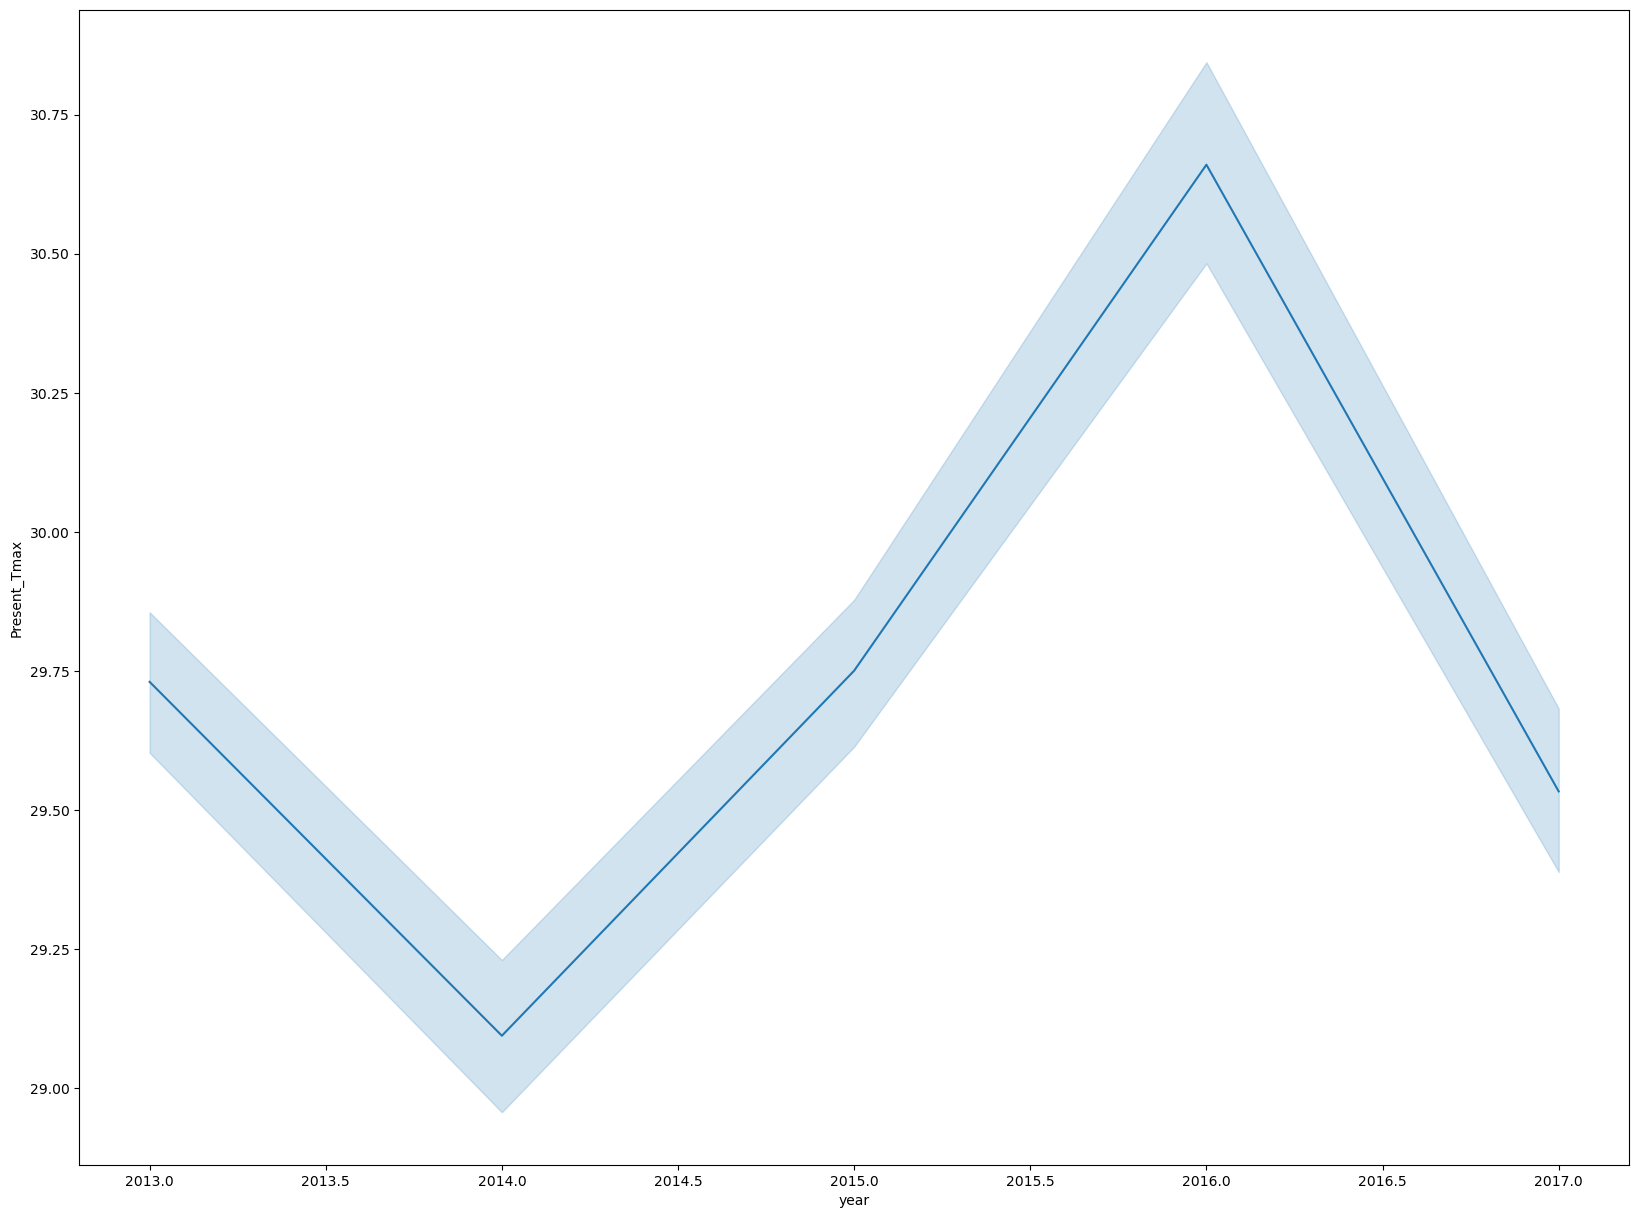

In [7]:
plt.figure(figsize=(20,15))
sns.lineplot(x='year',y='Present_Tmax',data=df)

In [8]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'day',
       'month', 'year'],
      dtype='object')

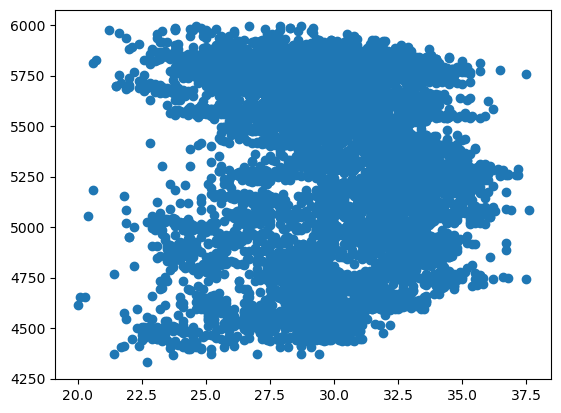

In [9]:
 plt.scatter(df['Present_Tmax'],df['Solar radiation'])

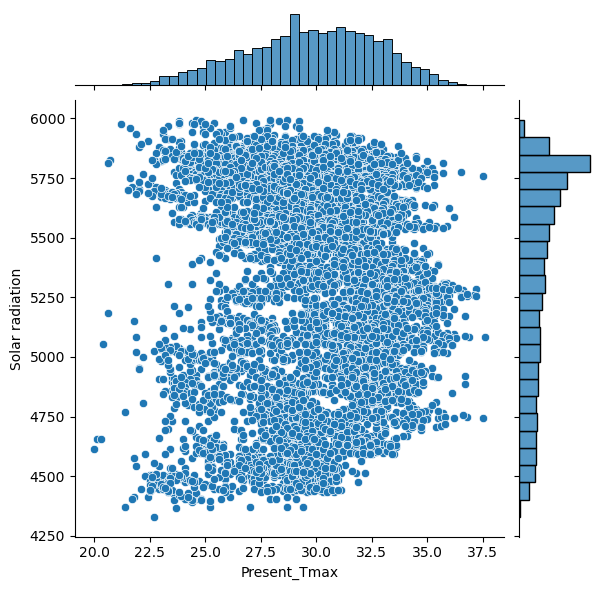

In [10]:
sns.jointplot(x='Present_Tmax',y='Solar radiation',data=df)

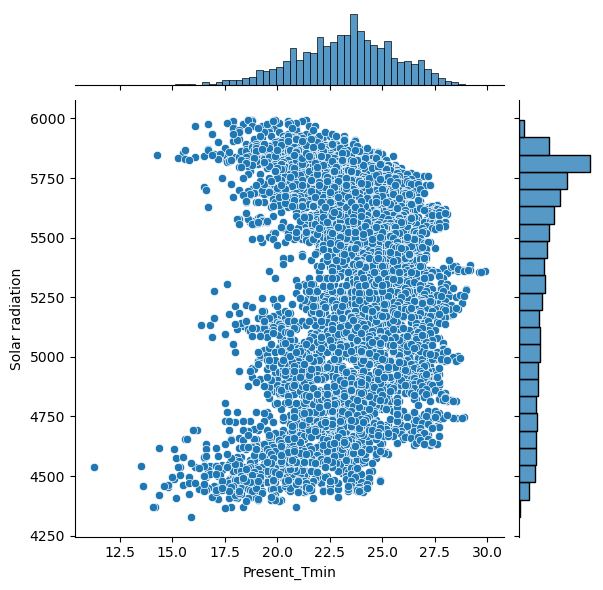

In [11]:
sns.jointplot(x='Present_Tmin',y='Solar radiation',data=df)

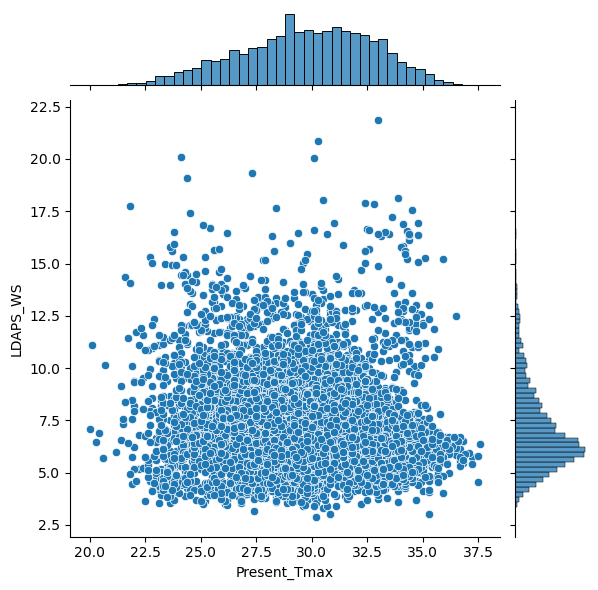

In [12]:
sns.jointplot(x='Present_Tmax',y='LDAPS_WS',data=df)

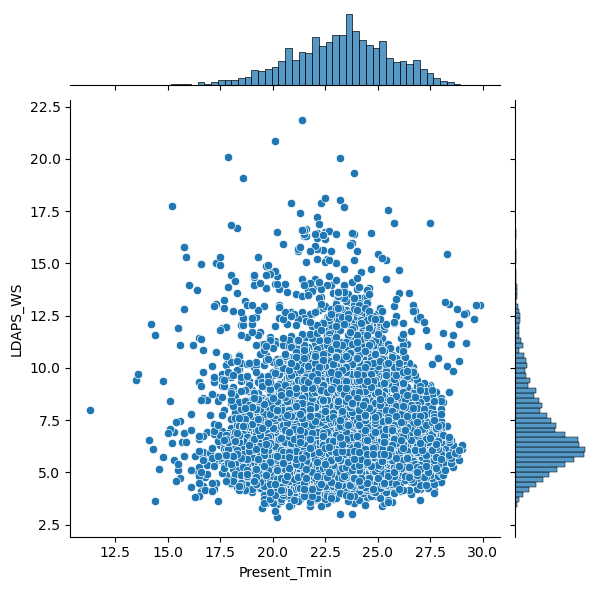

In [13]:
sns.jointplot(x='Present_Tmin',y='LDAPS_WS',data=df)

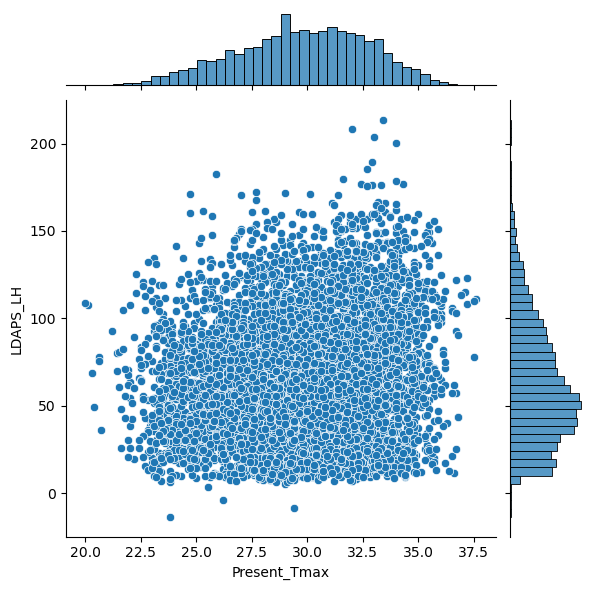

In [14]:
sns.jointplot(x='Present_Tmax',y='LDAPS_LH',data=df)

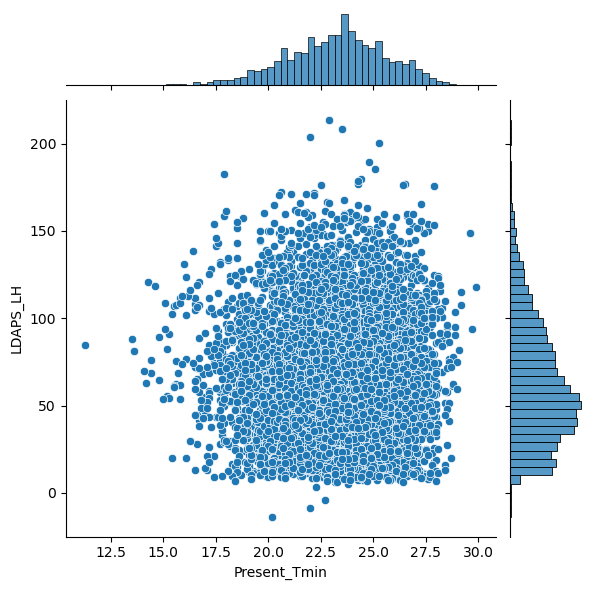

In [15]:
sns.jointplot(x='Present_Tmin',y='LDAPS_LH',data=df)

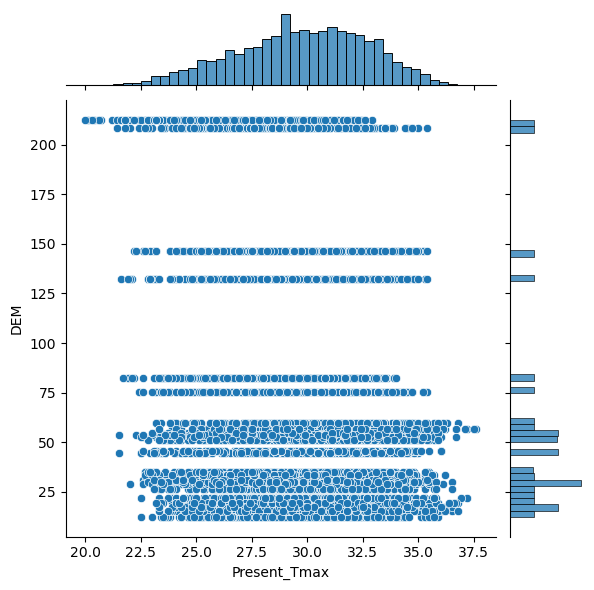

In [16]:
sns.jointplot(x='Present_Tmax',y='DEM',data=df)

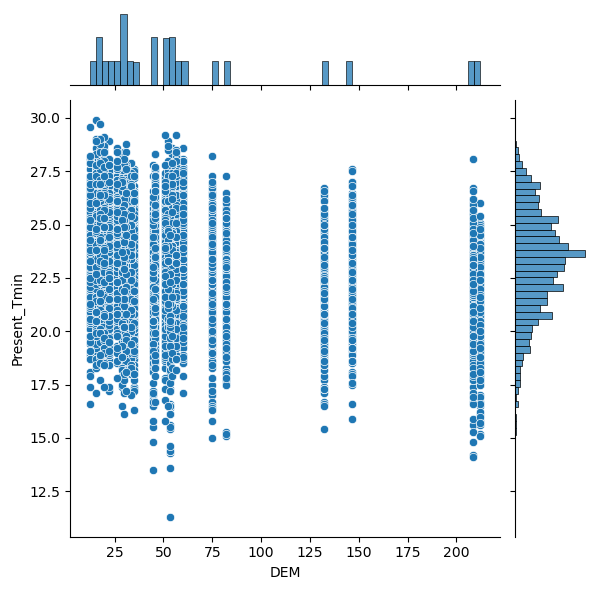

In [17]:
sns.jointplot(x='DEM',y='Present_Tmin',data=df)

.

.

In [18]:
df=df.drop('Date',axis=1)

In [19]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
day                 0
month               0
year                0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Present_Tmax      7588 non-null   float64
 2   Present_Tmin      7588 non-null   float64
 3   LDAPS_RHmin       7588 non-null   float64
 4   LDAPS_RHmax       7588 non-null   float64
 5   LDAPS_Tmax_lapse  7588 non-null   float64
 6   LDAPS_Tmin_lapse  7588 non-null   float64
 7   LDAPS_WS          7588 non-null   float64
 8   LDAPS_LH          7588 non-null   float64
 9   LDAPS_CC1         7588 non-null   float64
 10  LDAPS_CC2         7588 non-null   float64
 11  LDAPS_CC3         7588 non-null   float64
 12  LDAPS_CC4         7588 non-null   float64
 13  LDAPS_PPT1        7588 non-null   float64
 14  LDAPS_PPT2        7588 non-null   float64
 15  LDAPS_PPT3        7588 non-null   float64
 16  LDAPS_PPT4        7588 non-null   float64


In [21]:
for col in df.columns:
    print(col," : ",len(df[col].unique()))

station  :  25
Present_Tmax  :  167
Present_Tmin  :  155
LDAPS_RHmin  :  7585
LDAPS_RHmax  :  7577
LDAPS_Tmax_lapse  :  7588
LDAPS_Tmin_lapse  :  7588
LDAPS_WS  :  7588
LDAPS_LH  :  7588
LDAPS_CC1  :  7485
LDAPS_CC2  :  7496
LDAPS_CC3  :  7512
LDAPS_CC4  :  7438
LDAPS_PPT1  :  2779
LDAPS_PPT2  :  2479
LDAPS_PPT3  :  2326
LDAPS_PPT4  :  1892
lat  :  12
lon  :  25
DEM  :  25
Slope  :  25
Solar radiation  :  1575
Next_Tmax  :  181
Next_Tmin  :  157
day  :  21
month  :  12
year  :  5


In [22]:
df.year.value_counts()

2014    1547
2015    1533
2013    1510
2017    1506
2016    1492
Name: year, dtype: int64

In [23]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat         lon          DEM        Slope  \
count  7588.000000  ...  7588.000000  7588.00000  7588.000000  7588.000000   
mean      0.368510  ...    37.544792   126.99142    61.918136     1.259755   
std       0.262260  ...     0.050428     0.07922    54.323529     1.372748   
min       0.000000  ...    37.456200   126.82600    12.370000     0.098500   
25%       0.146546  ...    37.510200   126.93700    28.700000     0.271300   
50%       0.315706  ...    37.550700   126.99500    45.716000     0.618000   
75%       0.574174  ...    37.577600   127.04200    59.832400     1.767800   
max       0.967277  ...    37.645000   127.13500   212.335000     5.178200   

       Solar radiation    Next_Tmax    Next_Tmin          day        month  \
count      7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean       5343.724208    30.241526    22.910820    16.337375     7.068134   
std         429.782561     3.111807     2.482256     8.216880     2.242389   
min        4329.520508    17.400000    11.300000     7.000000     1.000000   
25%        5001.485717    28.200000    21.300000     8.000000     7.000000   
50%        5441.987305    30.400000    23.100000    16.000000     7.000000   
75%        5729.485840    32.600000    24.600000    24.000000     8.000000   
max        5992.895996    38.900000    29.800000    31.000000    12.000000   

              year  
count  7588.000000  
mean   2014.991697  
std       1.410877  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

In [24]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
day                 0.245563
month              -0.703092
year                0.013575
dtype: float64

<Axes: >

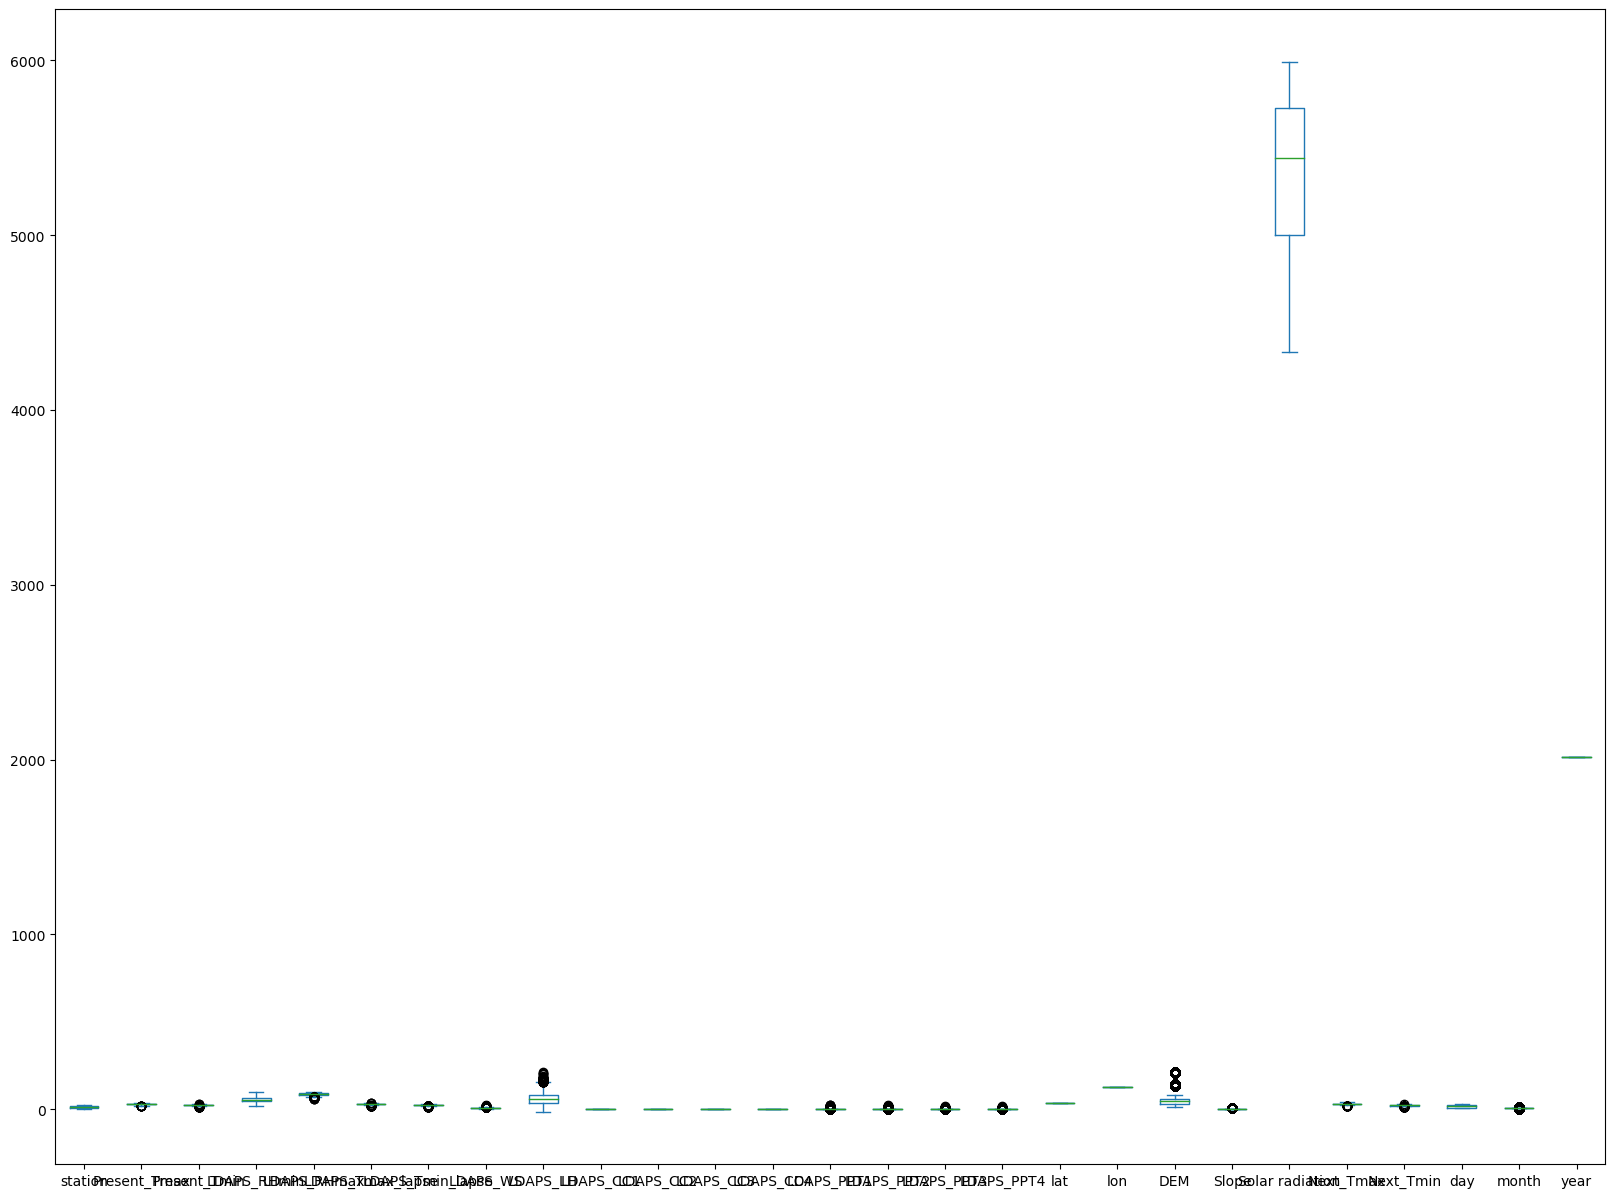

In [25]:
df.plot(kind='box',figsize=(20,15))

In [26]:
scaler = StandardScaler()
a = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [27]:
a.describe()

station  Present_Tmax  Present_Tmin   LDAPS_RHmin   LDAPS_RHmax  \
count  7.588000e+03  7.588000e+03  7.588000e+03  7.588000e+03  7.588000e+03   
mean  -8.193528e-17  7.341401e-16  2.996490e-16 -2.434648e-16 -1.573157e-15   
std    1.000066e+00  1.000066e+00  1.000066e+00  1.000066e+00  1.000066e+00   
min   -1.664607e+00 -3.285370e+00 -4.955097e+00 -2.525046e+00 -4.087320e+00   
25%   -8.332802e-01 -6.566334e-01 -6.647206e-01 -7.360197e-01 -5.774566e-01   
50%   -1.953785e-03  5.110336e-02  8.505394e-02 -1.163556e-01  1.977084e-01   
75%    8.293726e-01  7.588401e-01  6.682119e-01  7.104074e-01  7.475921e-01   
max    1.660699e+00  2.646138e+00  2.792573e+00  2.857987e+00  1.616802e+00   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse      LDAPS_WS      LDAPS_LH  \
count      7.588000e+03      7.588000e+03  7.588000e+03  7.588000e+03   
mean       2.022631e-16      4.869297e-16  8.989471e-17  1.236052e-16   
std        1.000066e+00      1.000066e+00  1.000066e+00  1.000066e+00   
min       -4.075414e+00     -3.944264e+00 -1.934648e+00 -2.259113e+00   
25%       -6.612885e-01     -6.083296e-01 -6.517274e-01 -7.506962e-01   
50%        3.037727e-02      1.052169e-01 -2.509355e-01 -1.660816e-01   
75%        7.104203e-01      7.017831e-01  4.294491e-01  6.455023e-01   
max        3.031333e+00      2.607365e+00  6.781933e+00  4.480515e+00   

          LDAPS_CC1  ...           lat           lon           DEM  \
count  7.588000e+03  ...  7.588000e+03  7.588000e+03  7.588000e+03   
mean  -2.247368e-17  ... -1.190976e-13  4.159082e-14  7.678506e-17   
std    1.000066e+00  ...  1.000066e+00  1.000066e+00  1.000066e+00   
min   -1.405227e+00  ... -1.756917e+00 -2.088254e+00 -9.121536e-01   
25%   -8.464066e-01  ... -6.860165e-01 -6.869955e-01 -6.115274e-01   
50%   -2.013557e-01  ...  1.171587e-01  4.519368e-02 -2.982723e-01   
75%    7.842487e-01  ...  6.506256e-01  6.385194e-01 -3.839725e-02   
max    2.283257e+00  ...  1.987268e+00  1.812547e+00  2.769091e+00   

              Slope  Solar radiation     Next_Tmax     Next_Tmin  \
count  7.588000e+03     7.588000e+03  7.588000e+03  7.588000e+03   
mean  -1.610613e-16     1.318456e-15 -9.139295e-16  1.146157e-15   
std    1.000066e+00     1.000066e+00  1.000066e+00  1.000066e+00   
min   -8.459901e-01    -2.359962e+00 -4.126982e+00 -4.677836e+00   
25%   -7.201029e-01    -7.963586e-01 -6.561013e-01 -6.489767e-01   
50%   -4.675272e-01     2.286495e-01  5.093001e-02  7.621808e-02   
75%    3.701178e-01     8.976331e-01  7.579613e-01  6.805470e-01   
max    2.854641e+00     1.510565e+00  2.782642e+00  2.775554e+00   

                day         month          year  
count  7.588000e+03  7.588000e+03  7.588000e+03  
mean  -8.989471e-17 -2.078815e-16  1.546189e-14  
std    1.000066e+00  1.000066e+00  1.000066e+00  
min   -1.136440e+00 -2.706281e+00 -1.411767e+00  
25%   -1.014731e+00 -3.038651e-02 -7.029408e-01  
50%   -4.106146e-02 -3.038651e-02  5.885086e-03  
75%    9.326083e-01  4.155958e-01  7.147110e-01  
max    1.784569e+00  2.199525e+00  1.423537e+00  

[8 rows x 27 columns]

<Axes: >

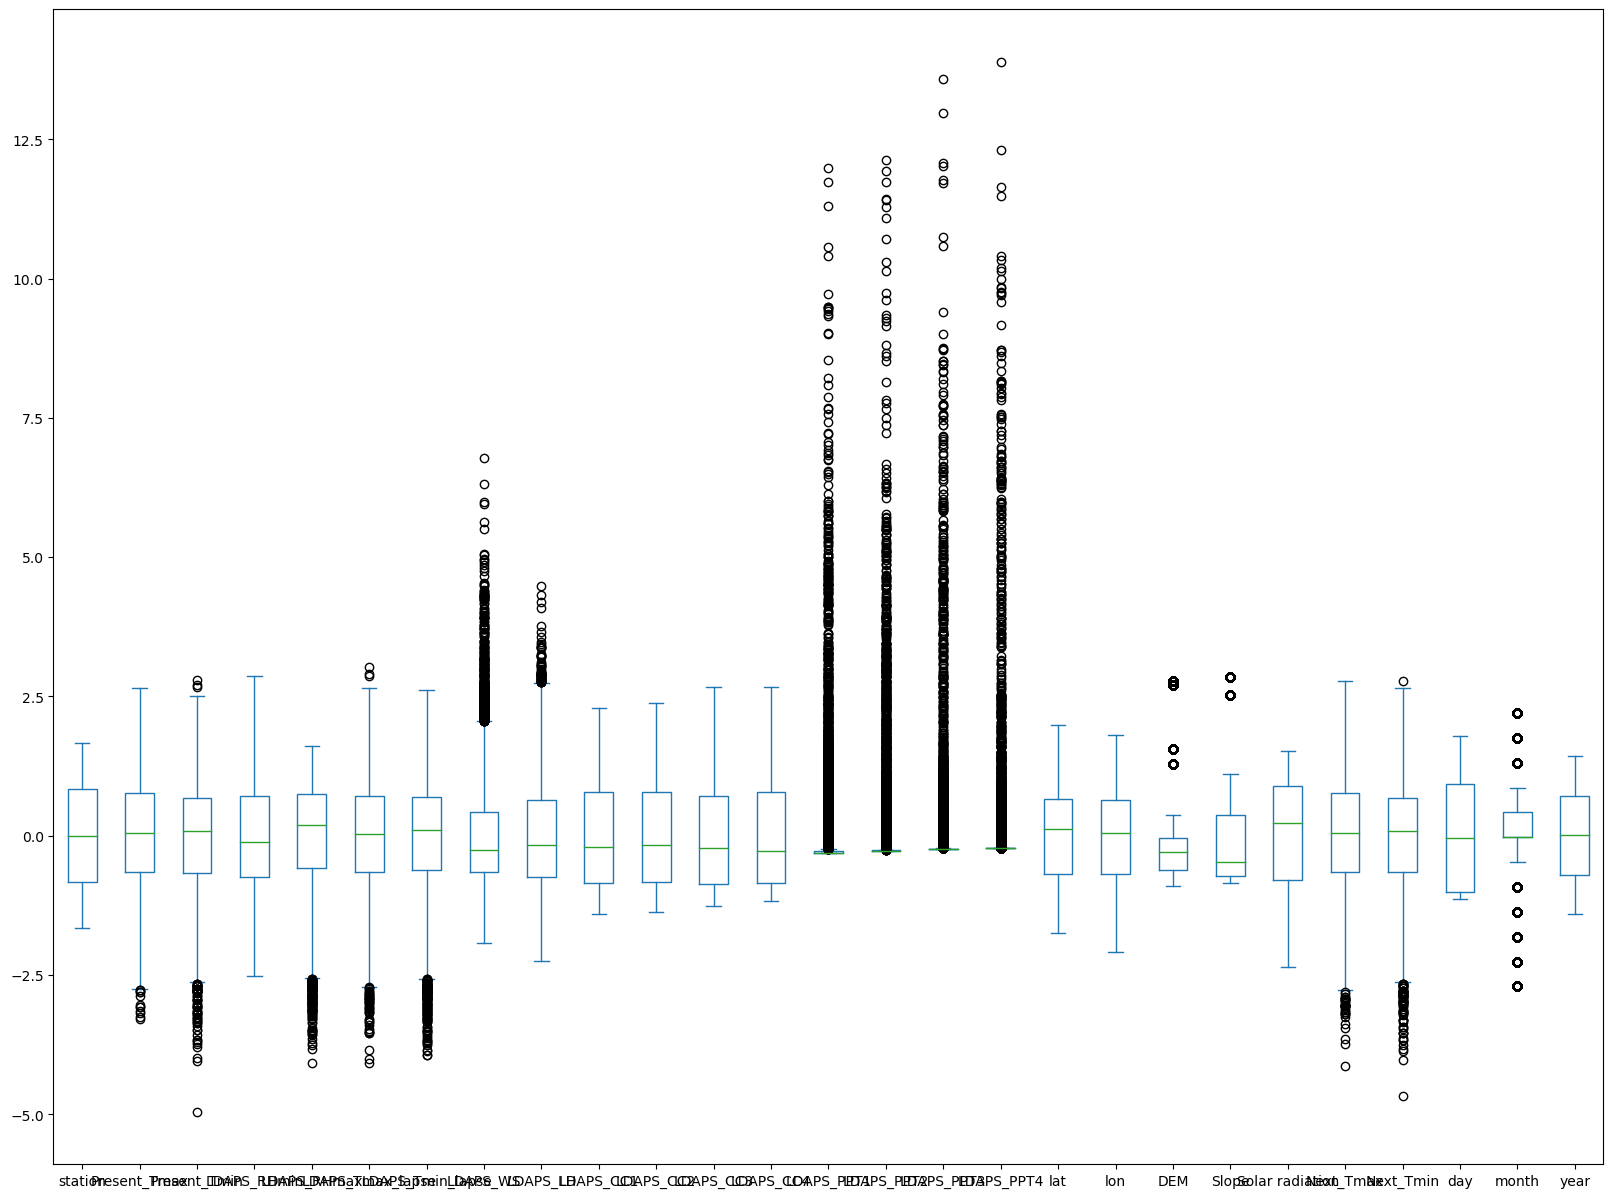

In [28]:
a.plot(kind='box',figsize=(20,15))

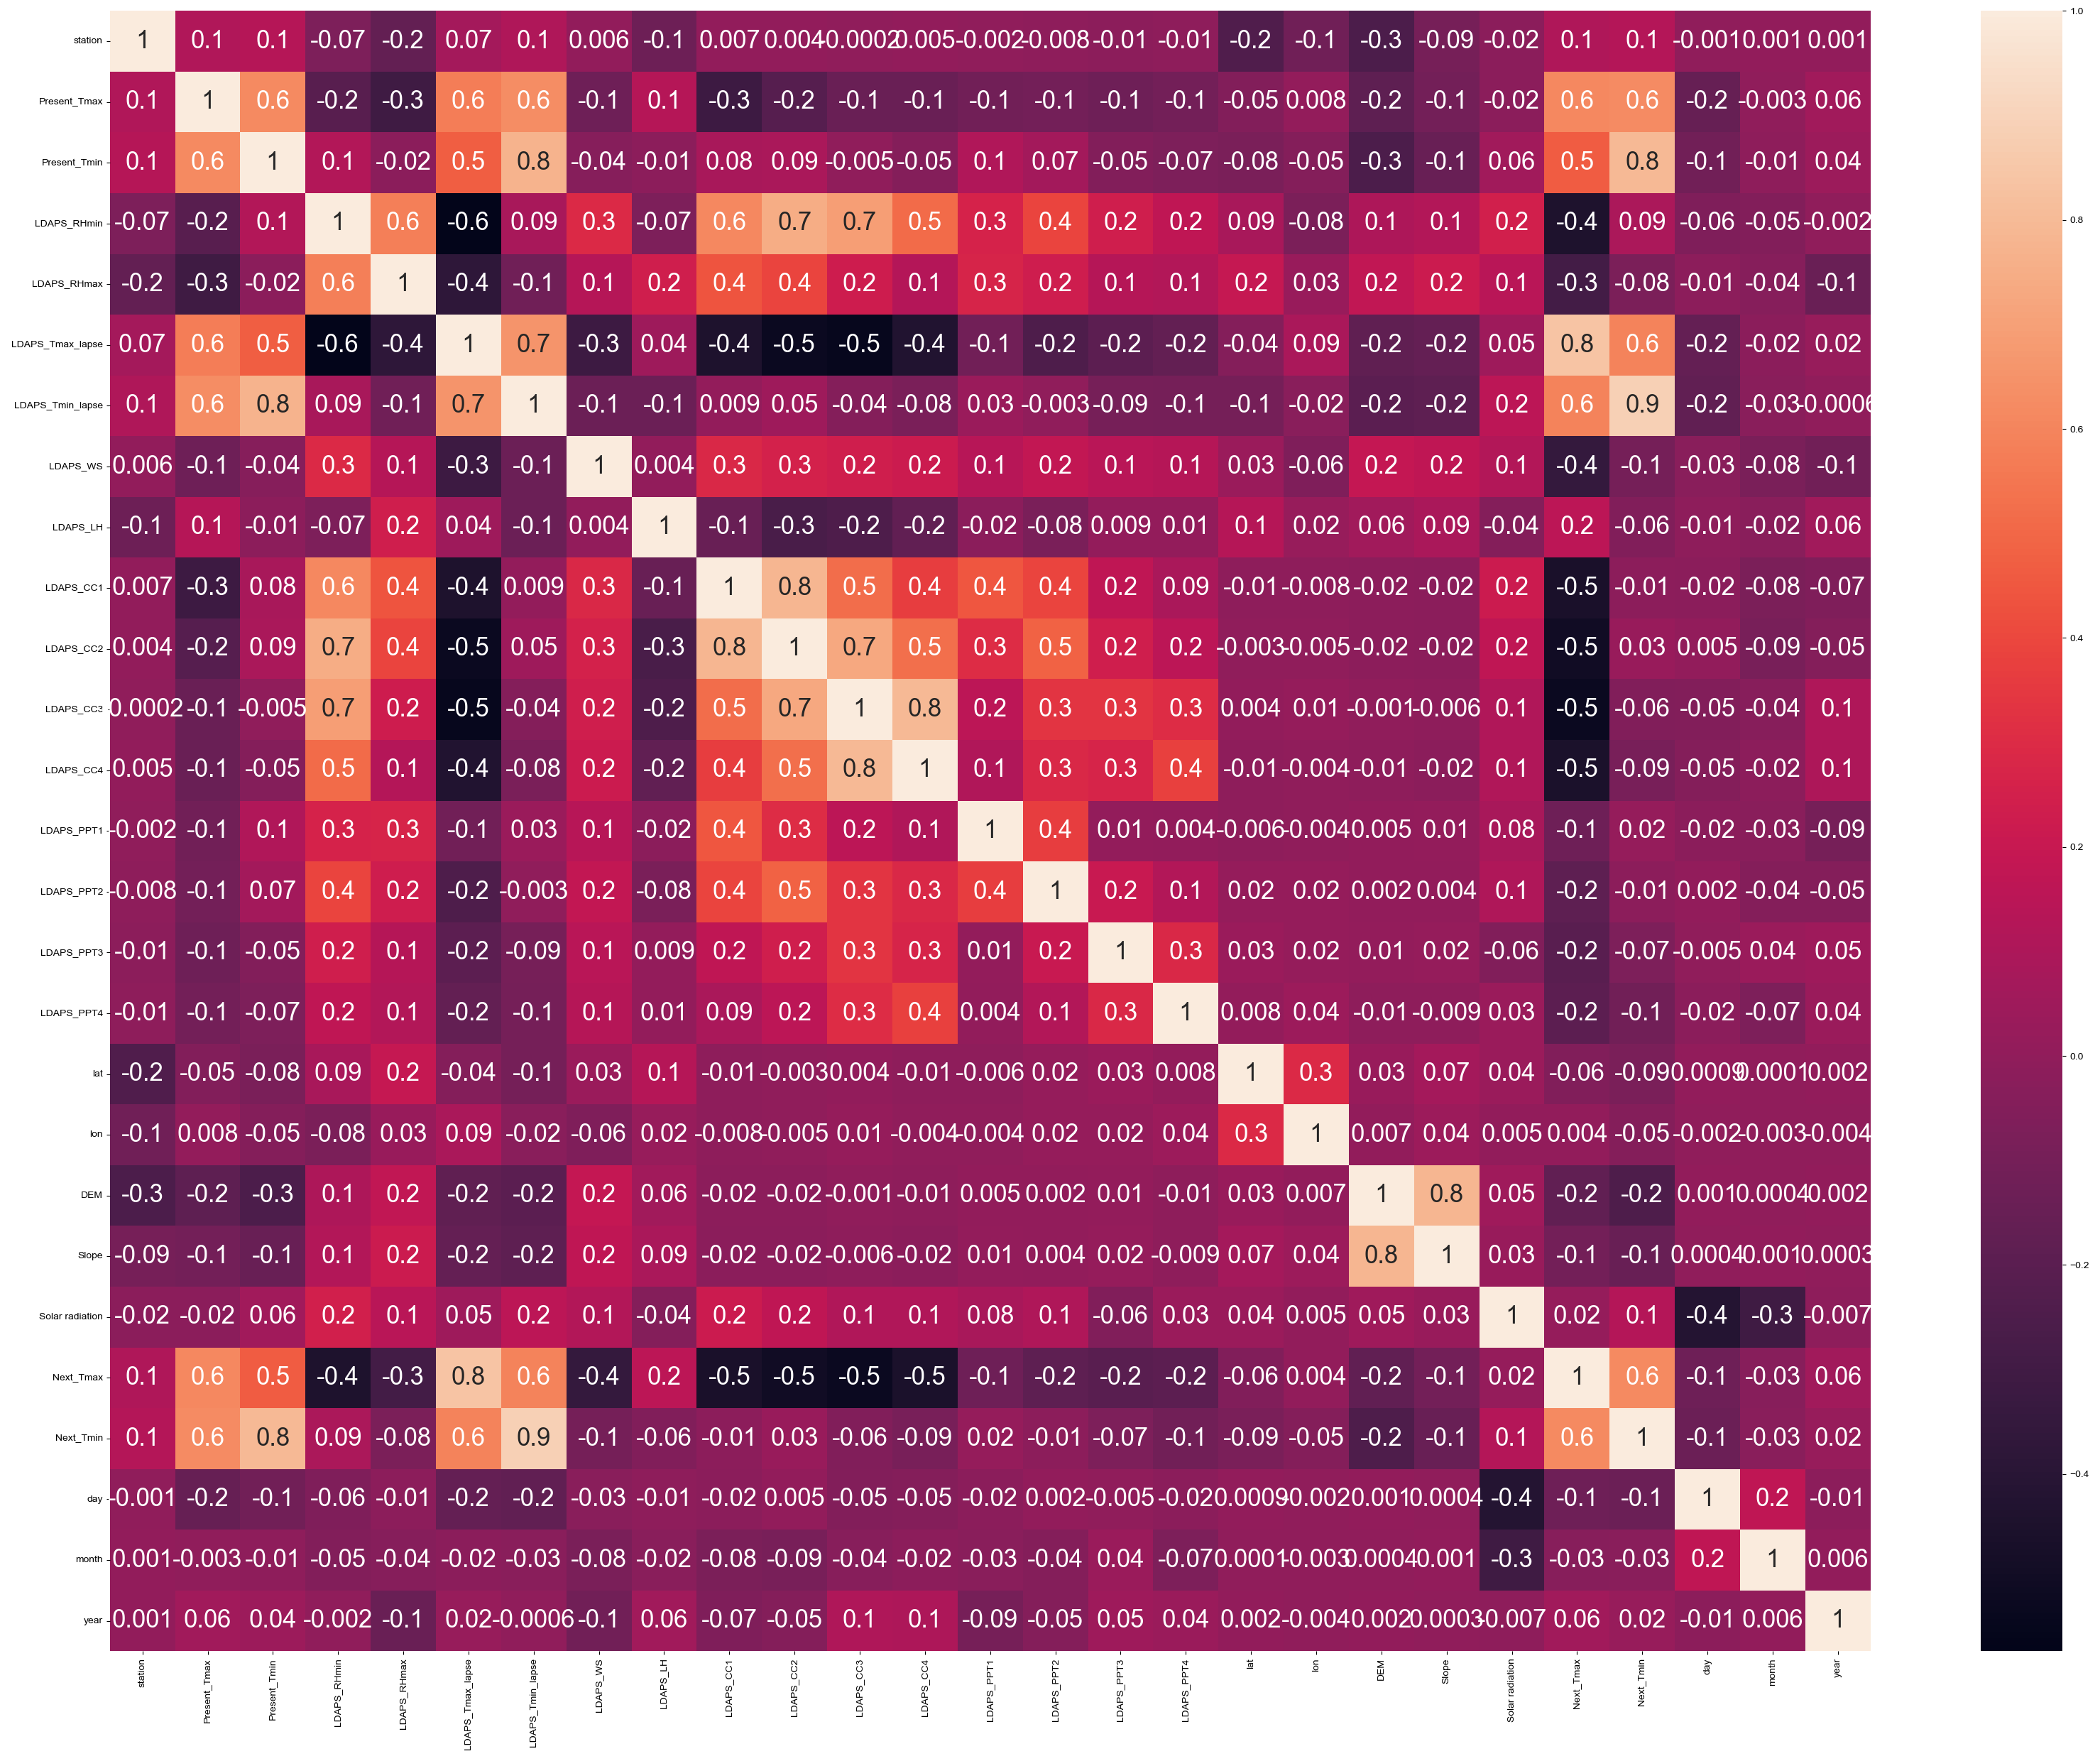

In [29]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':25})
sns.set(font_scale=4)

In [30]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'day', 'month', 'year'],
      dtype='object')

In [31]:
df=df.drop(['day', 'month', 'year','lat', 'lon',],axis=1)

In [32]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      ...  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  \
0     ...   0.130928         0.0         0.0         0.0         0.0   
1     ...   0.127727         0.0         0.0         0.0         0.0   
2     ...   0.142125         0.0         0.0         0.0         0.0   
3     ...   0.134249         0.0         0.0         0.0         0.0   
4     ...   0.170021         0.0         0.0         0.0         0.0   
...   ...        ...         ...         ...         ...         ...   
7745  ...   0.004380         0.0         0.0         0.0         0.0   
7746  ...   0.017678         0.0         0.0         0.0         0.0   
7747  ...   0.000000         0.0         0.0         0.0         0.0   
7748  ...   0.000000         0.0         0.0         0.0         0.0   
7749  ...   0.000796         0.0         0.0         0.0         0.0   

           DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     212.3350  2.7850      5992.895996       29.1       21.2  
1      44.7624  0.5141      5869.312500       30.5       22.5  
2      33.3068  0.2661      5863.555664       31.1       23.9  
3      45.7160  2.5348      5856.964844       31.7       24.3  
4      35.0380  0.5055      5859.552246       31.2       22.5  
...        ...     ...              ...        ...        ...  
7745   26.2980  0.5721      4456.024414       27.6       17.7  
7746   21.9668  0.1332      4441.803711       28.0       17.1  
7747   15.5876  0.1554      4443.313965       28.3       18.1  
7748   17.2956  0.2223      4438.373535       28.6       18.8  
7749   19.5844  0.2713      4451.345215       27.8       17.4  

[7588 rows x 22 columns]

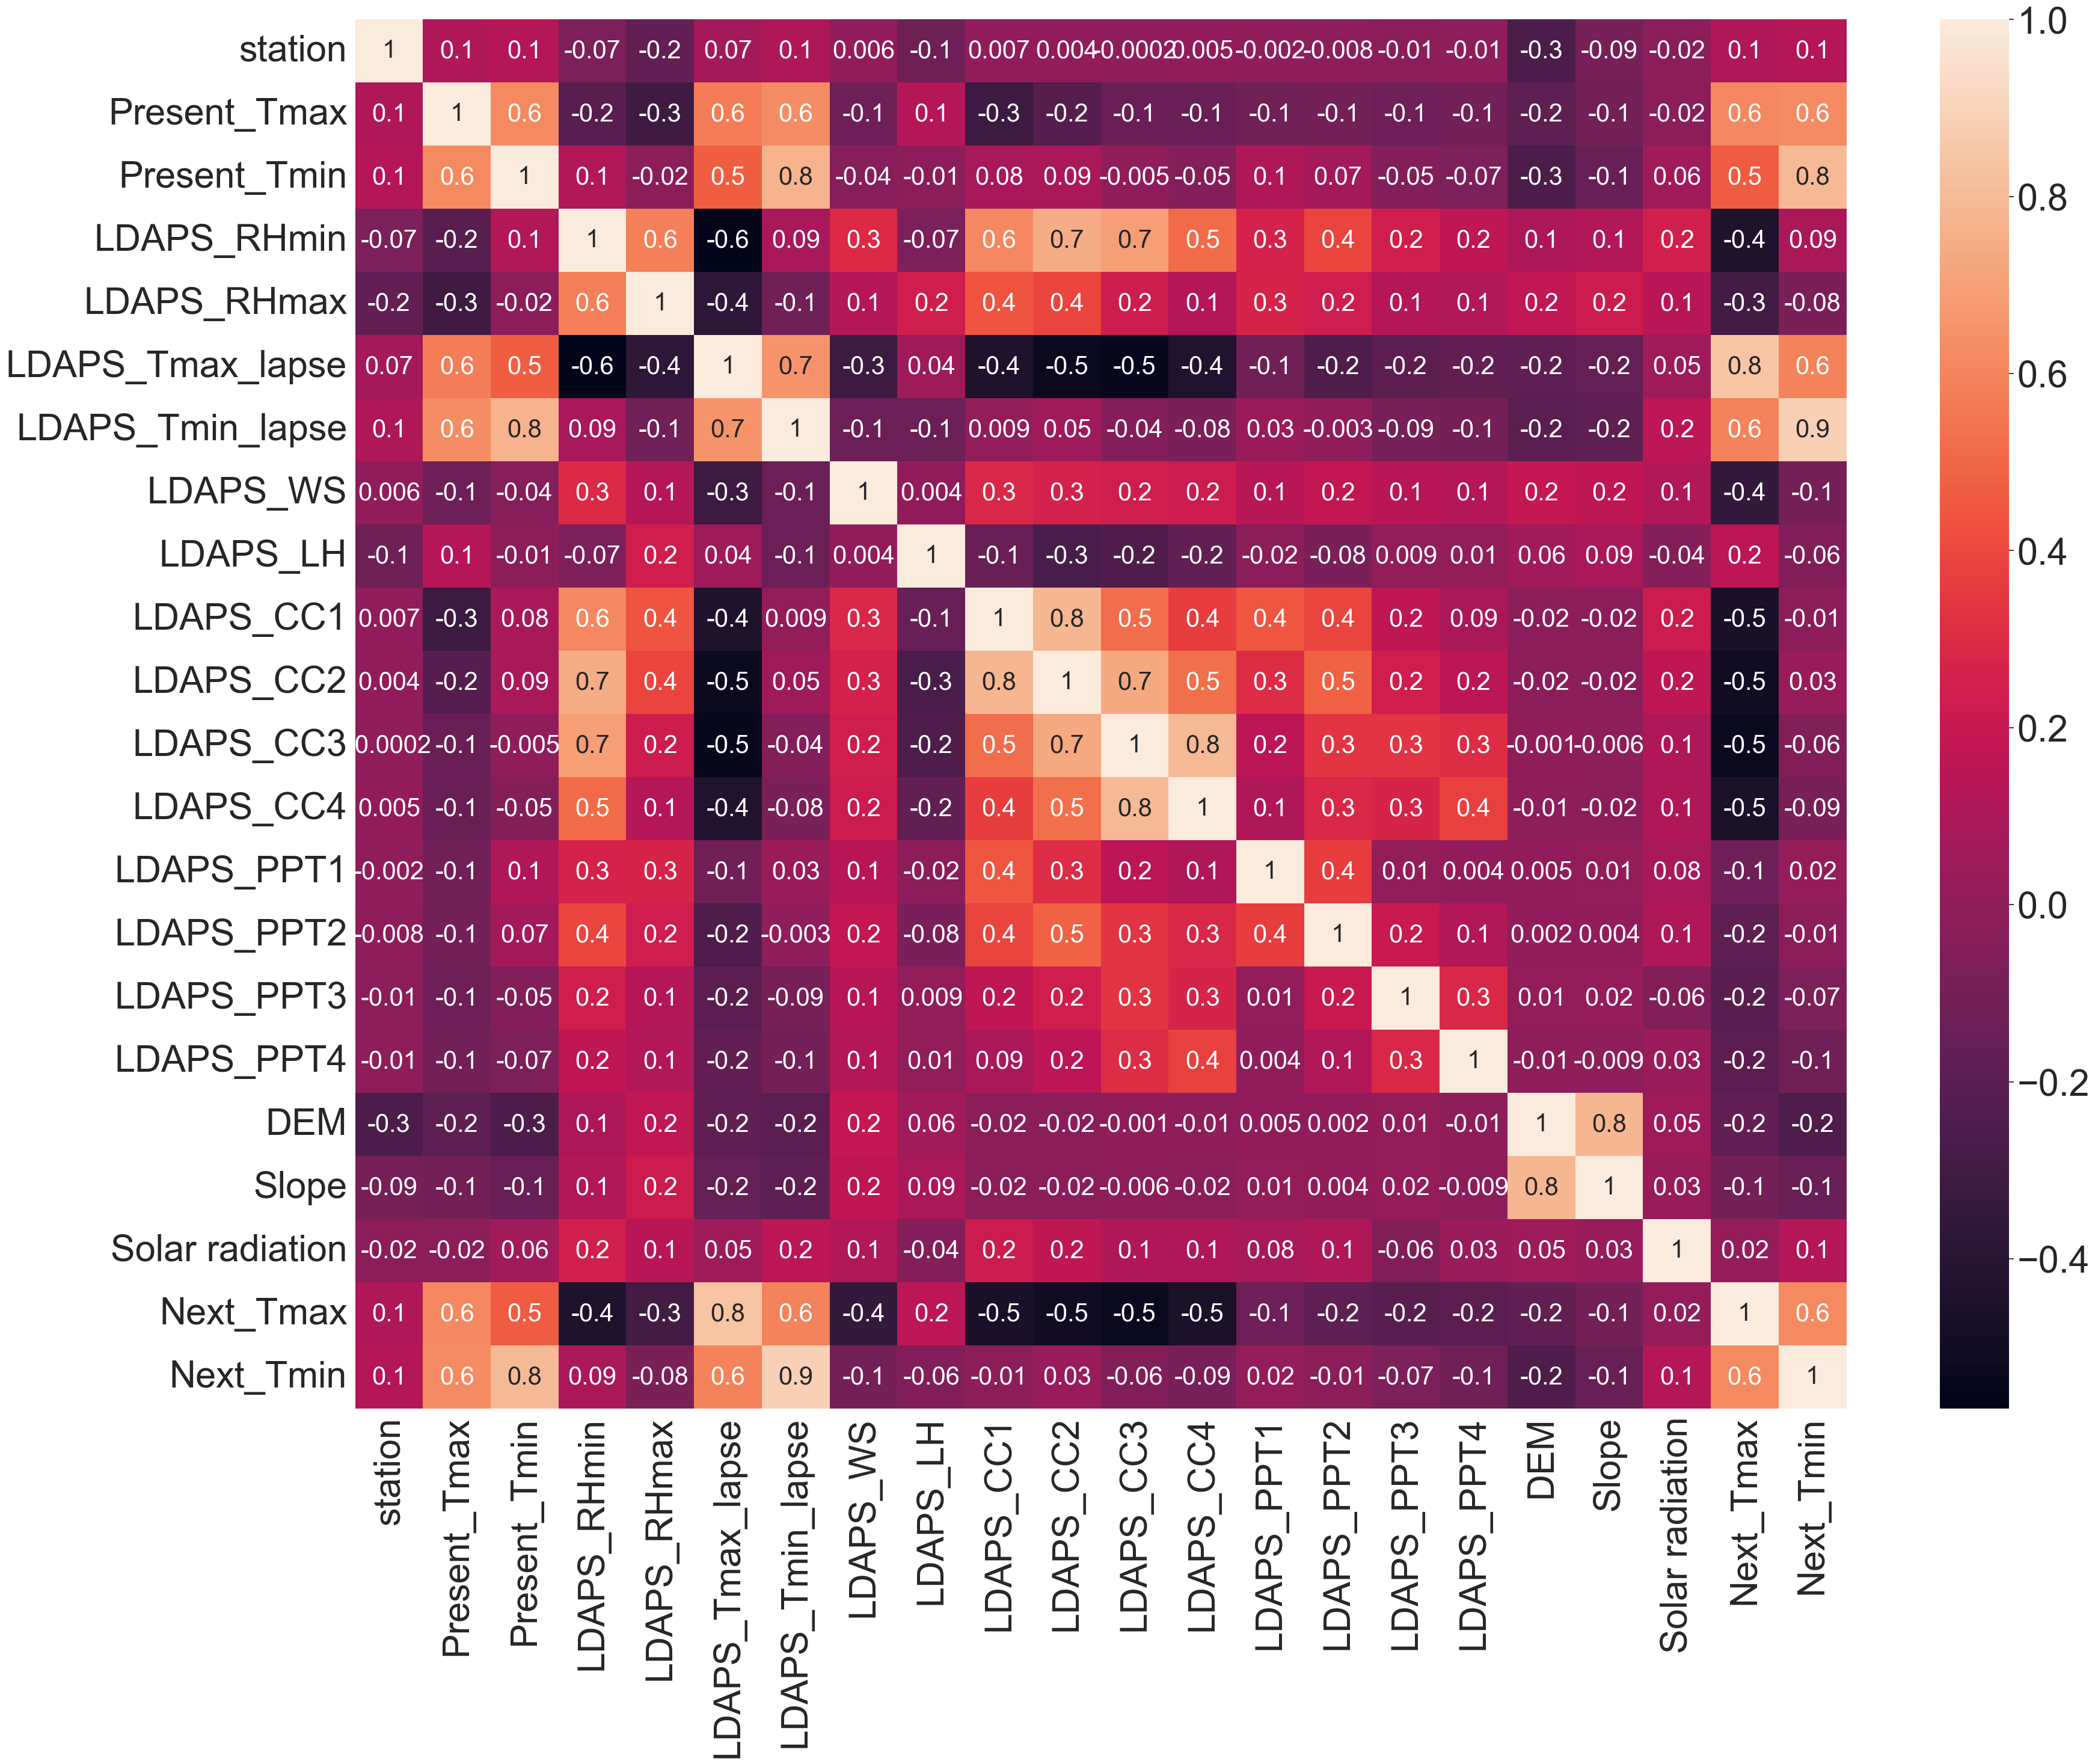

In [33]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':30})
sns.set(font_scale=4)

.

.

.

In [34]:
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [35]:
from sklearn.metrics import accuracy_score , confusion_matrix

.

## Next_Tmax

In [36]:
from sklearn.model_selection import train_test_split,cross_val_score
x=df.drop(['Next_Tmax', 'Next_Tmin'],axis=1)
y=df['Next_Tmax']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30 ,random_state=42)

x_train_sca=x_train
x_test_sca=x_test

.

0.05382603117111617
RMSE : 3.0110664473704776


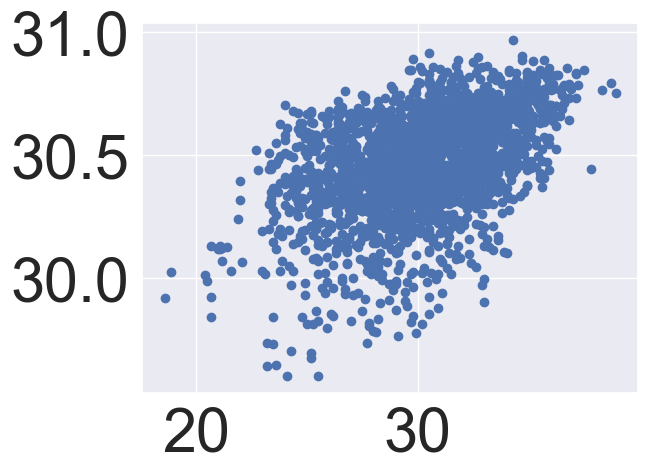

In [43]:
svm = SVR()
svm.fit(x_train_sca,y_train)
y_pred1 = svm.predict(x_test_sca)
svm1 = metrics.r2_score(y_test,y_pred1)
print(svm1)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))

plt.scatter(x=y_test,y=y_pred1)

0.7809263055160294
RMSE : 1.4488717941038842


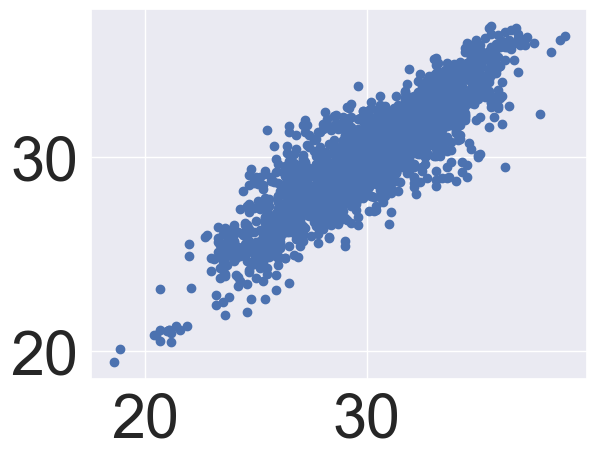

In [44]:
lr= LinearRegression()
lr.fit(x_train_sca,y_train)
y_pred2 = lr.predict(x_test_sca)
lr2 = metrics.r2_score(y_test,y_pred2)
print(lr2)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

plt.scatter(x=y_test,y=y_pred2)

In [47]:
lasso=Lasso(alpha=0.5)
lasso.fit(x_train_sca,y_train)
for i , col in enumerate(x_train_sca):
    print('lasso model for {} is : {}'.format(col,lasso.coef_[i]))

lasso model for station is : 0.016727778106567733
lasso model for Present_Tmax is : 0.14833938488125947
lasso model for Present_Tmin is : 0.0
lasso model for LDAPS_RHmin is : -0.0
lasso model for LDAPS_RHmax is : -0.0
lasso model for LDAPS_Tmax_lapse is : 0.7122526096394758
lasso model for LDAPS_Tmin_lapse is : 0.0
lasso model for LDAPS_WS is : -0.05989552932446164
lasso model for LDAPS_LH is : 0.009758985728709008
lasso model for LDAPS_CC1 is : -0.0
lasso model for LDAPS_CC2 is : -0.0
lasso model for LDAPS_CC3 is : -0.0
lasso model for LDAPS_CC4 is : -0.0
lasso model for LDAPS_PPT1 is : -0.0
lasso model for LDAPS_PPT2 is : 0.0
lasso model for LDAPS_PPT3 is : -0.0
lasso model for LDAPS_PPT4 is : -0.0
lasso model for DEM is : -0.0006790378245920438
lasso model for Slope is : 0.0
lasso model for Solar radiation is : -3.234628622953106e-06


In [48]:
print(lasso.score(x_train_sca,y_train))
print(lasso.score(x_test_sca,y_test))

0.7362694121873874
0.7448727219743208


0.8941241444432189
RMSE : 1.0072407972850452


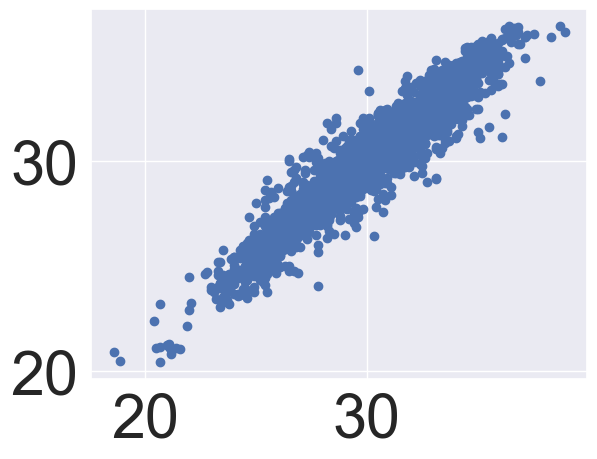

In [49]:
rfr= RandomForestRegressor()
rfr.fit(x_train_sca,y_train)
y_pred3 = rfr.predict(x_test_sca)
rfr3 = metrics.r2_score(y_test,y_pred3)

print(rfr3)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred3)))

plt.scatter(x=y_test,y=y_pred3)

0.7552873108290785
RMSE : 1.5313098867498358


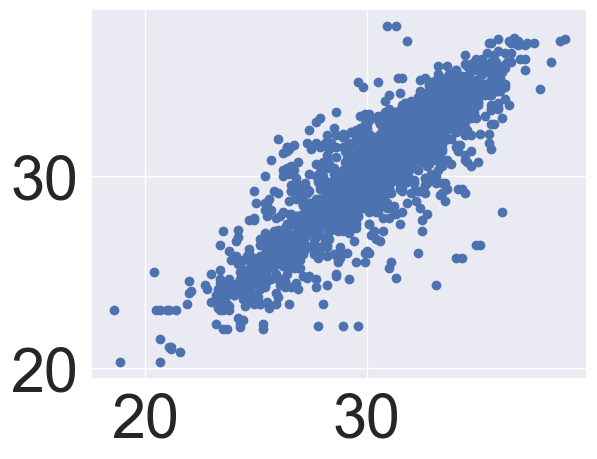

In [52]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_sca,y_train)
y_pred5= dtr.predict(x_test_sca)
dtr5 = metrics.r2_score(y_test,y_pred5)
print(dtr5)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred5)))

plt.scatter(x=y_test,y=y_pred5)

0.8456896381843318
RMSE : 1.2159966724873186


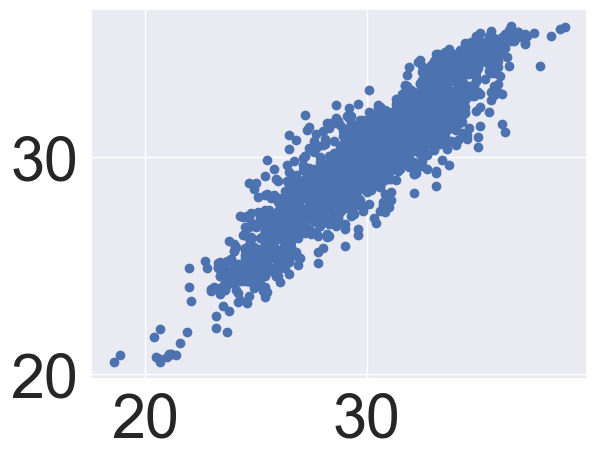

In [53]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train_sca,y_train)
y_pred4= gbr.predict(x_test_sca)
gbr4 = metrics.r2_score(y_test,y_pred4)
print(gbr4)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred4)))

plt.scatter(x=y_test,y=y_pred4)

0.915520004000256
RMSE : 0.8997291350562336


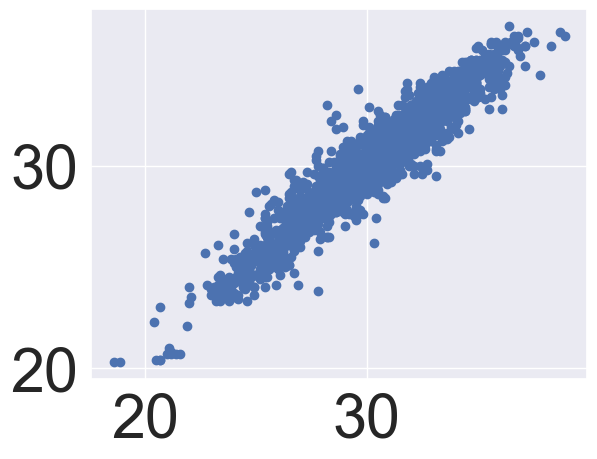

In [54]:
abr = AdaBoostRegressor(base_estimator=dtr)
abr.fit(x_train_sca,y_train)
y_pred5= abr.predict(x_test_sca)
abr5 = metrics.r2_score(y_test,y_pred5)
print(abr5)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred5)))

plt.scatter(x=y_test,y=y_pred5)

0.9146545120189737
RMSE : 0.9043262236343381


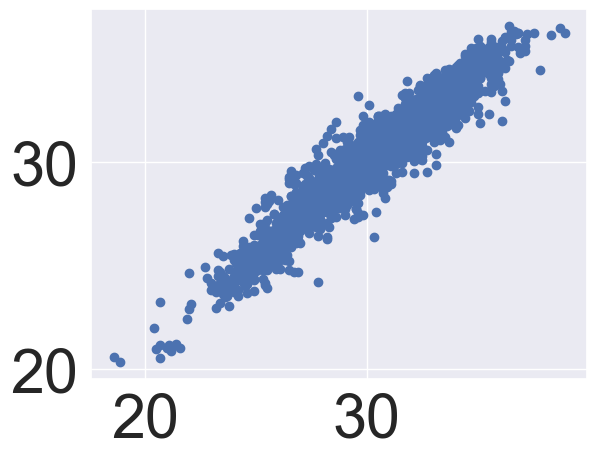

In [38]:
rfr= RandomForestRegressor()
abr6 = AdaBoostRegressor(base_estimator=rfr)
abr6.fit(x_train_sca,y_train)
y_pred6= abr6.predict(x_test_sca)
abr6 = metrics.r2_score(y_test,y_pred6)
print(abr6)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred6)))

plt.scatter(x=y_test,y=y_pred6)

## abr (AdaBoostRegressor) best performing

.

.

.

# Next_Tmin

In [55]:
from sklearn.model_selection import train_test_split,cross_val_score
x=df.drop(['Next_Tmax', 'Next_Tmin'],axis=1)
y=df['Next_Tmin']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30 ,random_state=42)

x_train_sca=x_train 
x_test_sca=x_test

0.13694835850470843
RMSE : 2.284072541921389


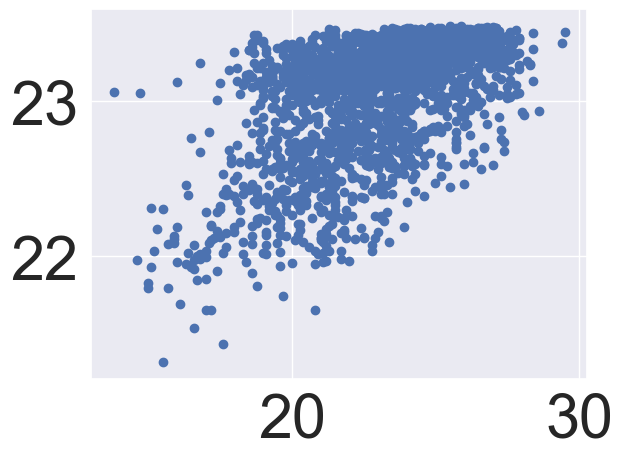

In [56]:
svm = SVR()
svm.fit(x_train_sca,y_train)
y_pred1 = svm.predict(x_test_sca)
svm1 = metrics.r2_score(y_test,y_pred1)
print(svm1)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))

plt.scatter(x=y_test,y=y_pred1)

0.833755656088607
RMSE : 1.0024551253825162


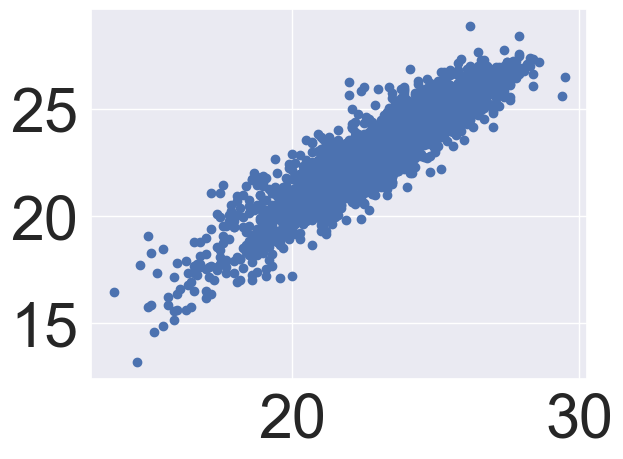

In [57]:
lr= LinearRegression()
lr.fit(x_train_sca,y_train)
y_pred2 = lr.predict(x_test_sca)
lr2 = metrics.r2_score(y_test,y_pred2)
print(lr2)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

plt.scatter(x=y_test,y=y_pred2)

0.8989509450985662
RMSE : 0.7815515513416115


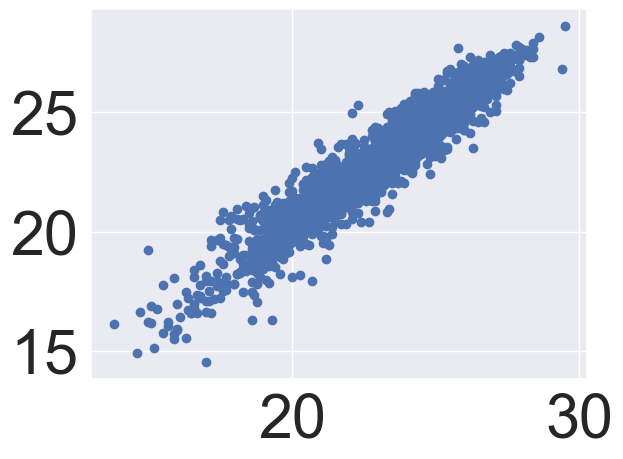

In [58]:
rfr= RandomForestRegressor()
rfr.fit(x_train_sca,y_train)
y_pred3 = rfr.predict(x_test_sca)
rfr3 = metrics.r2_score(y_test,y_pred3)

print(rfr3)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred3)))

plt.scatter(x=y_test,y=y_pred3)

0.7745124809619763
RMSE : 1.1674888877545273


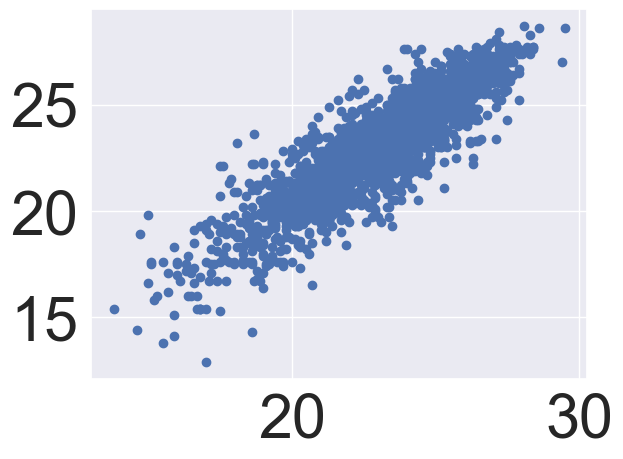

In [59]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_sca,y_train)
y_pred5= dtr.predict(x_test_sca)
dtr5 = metrics.r2_score(y_test,y_pred5)
print(dtr5)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred5)))

plt.scatter(x=y_test,y=y_pred5)

0.8864658551908668
RMSE : 0.8284279596031293


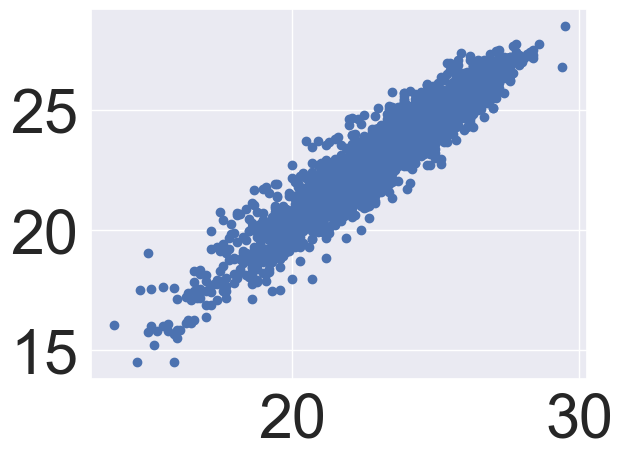

In [60]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train_sca,y_train)
y_pred4= gbr.predict(x_test_sca)
gbr4 = metrics.r2_score(y_test,y_pred4)
print(gbr4)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred4)))

plt.scatter(x=y_test,y=y_pred4)

0.9101652063025352
RMSE : 0.7369088782026073


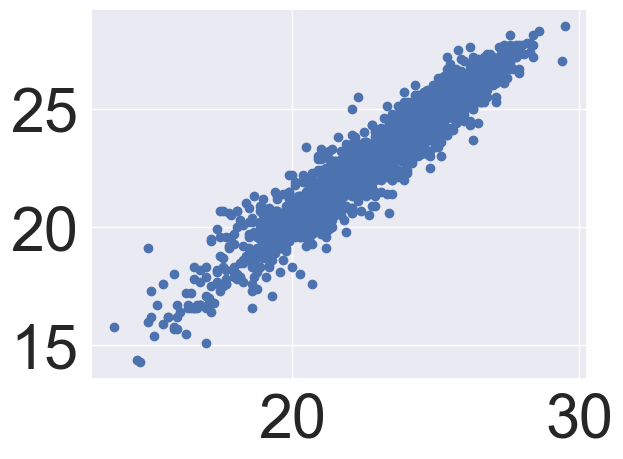

In [61]:
abr = AdaBoostRegressor(base_estimator=dtr)
abr.fit(x_train_sca,y_train)
y_pred5= abr.predict(x_test_sca)
abr5 = metrics.r2_score(y_test,y_pred5)
print(abr5)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred5)))

plt.scatter(x=y_test,y=y_pred5)

## abr ( AdaBoostRegressor(base_estimator=dtr))
## best performing